In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd "/content/gdrive/My Drive/Colab Notebooks/MDM Fall 2022 Playlist"

/content/gdrive/My Drive/Colab Notebooks/MDM Fall 2022 Playlist


#1. Mood Cluster Annotation Analysis

- Cluster1 (C_1)	passionate, rousing, confident, boisterous, rowdy
- Cluster2 (C_2)	cheerful, rollicking, fun, sweet, amiable/good natured
- Cluster3 (C_3)	bittersweet, literate, poignant, wistful, autumnal, brooding
- Cluster4 (C_4)	silly, quirky, humorous, campy, whimsical, witty, wry
- Cluster5 (C_5)	aggressive, fiery, tense/anxious, intense, volatile, visceral

In [5]:
df_clusters = pd.read_csv('clusters.csv',index_col=0, dtype='category')

In [6]:
df_clusters

,Artist,Vishwas,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,,
A Thousand Years,Christina Perri,3,4,3,3,3,3,3,3,3,3,3,3,3,3
As it was,Harry Styles,2,3,2,3,3,2,2,3,3,2,2,2,2,2
Kissing Your Shadow - Roger Voka Remix,"Neteta, Roger Voka",3,2,3,5,1,2,3,2,1,1,1,2,2,2
Minnet Eylemem,Serhat Durmus,3,2,3,5,3,3,1,5,3,3,3,3,3,1
Take Me To Church,Hozier,5,5,5,5,5,5,5,5,5,5,5,1,1,3
Pasoori,Coke studio,2,5,1,5,1,1,2,5,1,1,1,2,2,2
Unstoppable,Sia,5,2,5,1,1,1,5,5,1,1,1,1,1,1
Laal Ishq,Arijit Singh,1,1,1,1,1,2,1,1,1,1,1,3,3,3
Coming Back to Life,Pink Floyd,2,2,3,2,3,3,3,3,3,3,3,2,2,3


## Agreed Labels

In [7]:
clusters=pd.DataFrame()
for index, row in df_clusters.iterrows():
  clusters[index]=row['Vishwas':'Andrea'].value_counts().reindex(['1','2','3','4','5'],fill_value=0)
clusters=clusters.transpose()
clusters

,1,2,3,4,5
A Thousand Years,0,0,13,1,0
As it was,0,9,5,0,0
Kissing Your Shadow - Roger Voka Remix,4,6,3,0,1
Minnet Eylemem,2,1,9,0,2
Take Me To Church,2,0,1,0,11
Pasoori,6,5,0,0,3
Unstoppable,9,1,0,0,4
Laal Ishq,10,1,3,0,0
Coming Back to Life,0,5,9,0,0
Space Song,0,0,12,2,0


In [8]:
df_clusters2 = df_clusters.copy()
df_clusters2["agreed_cluster"] = clusters.idxmax(axis=1)
df_clusters2["agreement_level"] = clusters.max(axis=1)

In [9]:
df_clusters2

,Artist,Vishwas,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea,agreed_cluster,agreement_level
Title,,,,,,,,,,,,,,,,,
A Thousand Years,Christina Perri,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,13
As it was,Harry Styles,2,3,2,3,3,2,2,3,3,2,2,2,2,2,2,9
Kissing Your Shadow - Roger Voka Remix,"Neteta, Roger Voka",3,2,3,5,1,2,3,2,1,1,1,2,2,2,2,6
Minnet Eylemem,Serhat Durmus,3,2,3,5,3,3,1,5,3,3,3,3,3,1,3,9
Take Me To Church,Hozier,5,5,5,5,5,5,5,5,5,5,5,1,1,3,5,11
Pasoori,Coke studio,2,5,1,5,1,1,2,5,1,1,1,2,2,2,1,6
Unstoppable,Sia,5,2,5,1,1,1,5,5,1,1,1,1,1,1,1,9
Laal Ishq,Arijit Singh,1,1,1,1,1,2,1,1,1,1,1,3,3,3,1,10
Coming Back to Life,Pink Floyd,2,2,3,2,3,3,3,3,3,3,3,2,2,3,3,9


In [10]:
df_clusters2.sort_values('agreed_cluster')[['Artist','agreed_cluster']]

,Artist,agreed_cluster
Title,,
Counting Stars,One Republic,1
Pasoori,Coke studio,1
Unstoppable,Sia,1
Laal Ishq,Arijit Singh,1
Don't You Worry Child,Swedish House Mafia,2
Lift Off,Labrinth,2
Happy,Pharrell Williams,2
And You And I,Yes,2
Hold On Tight,"Jesse Barrera, Albert Posis",2


In [33]:
display(df_clusters2.sort_values('agreement_level')[['Artist','agreed_cluster','agreement_level']])

,Artist,agreed_cluster,agreement_level
Title,,,
Lift Off,Labrinth,2,5
Kissing Your Shadow - Roger Voka Remix,"Neteta, Roger Voka",2,6
Pasoori,Coke studio,1,6
Counting Stars,One Republic,1,6
Radioactive,Imagine Dragons,5,6
And You And I,Yes,2,6
Don't You Worry Child,Swedish House Mafia,2,7
Chandrachooda,Anoop Shankar,3,7
Shallow,"Lady Gaga, Bradley Cooper",3,7


In [12]:
clusters.idxmax(axis=1).value_counts().reindex(['1','2','3','4','5'],fill_value=0)

# - Cluster1 (C_1)	passionate, rousing, confident, boisterous, rowdy
# - Cluster2 (C_2)	cheerful, rollicking, fun, sweet, amiable/good natured
# - Cluster3 (C_3)	bittersweet, literate, poignant, wistful, autumnal, brooding
# - Cluster4 (C_4)	silly, quirky, humorous, campy, whimsical, witty, wry
# - Cluster5 (C_5)	aggressive, fiery, tense/anxious, intense, volatile, visceral

1     4
2     9
3    11
4     1
5     3
dtype: int64

## Agreements among Annotators

In [13]:
subjects = ['Vishwas','Akhil','Jhalak', 'Sasidev','Raghav', 'Jaydeep','Samardeep','Sumitha', 'Asha Rani Pondicherry','Shefali','Kyle','Shardul','Renu','Andrea']
annotation = []
for subject in subjects:
  for index in range(df_clusters[subject].shape[0]):
    annotation.append([subject, df_clusters[subject].index[index],df_clusters[subject][index]])
annotation  

[['Vishwas', 'A Thousand Years', '3'],
 ['Vishwas', 'As it was', '2'],
 ['Vishwas', 'Kissing Your Shadow - Roger Voka Remix', '3'],
 ['Vishwas', 'Minnet Eylemem', '3'],
 ['Vishwas', 'Take Me To Church', '5'],
 ['Vishwas', 'Pasoori', '2'],
 ['Vishwas', 'Unstoppable', '5'],
 ['Vishwas', 'Laal Ishq', '1'],
 ['Vishwas', 'Coming Back to Life', '2'],
 ['Vishwas', 'Space Song', '3'],
 ['Vishwas', 'And You And I', '4'],
 ['Vishwas', 'Epitaph', '5'],
 ['Vishwas', 'Radioactive', '5'],
 ['Vishwas', "Don't You Worry Child", '1'],
 ['Vishwas', 'Happy', '4'],
 ['Vishwas', 'The Scientist', '3'],
 ['Vishwas', 'Bohemian Rhapsody', '5'],
 ['Vishwas', 'Dandelions', '2'],
 ['Vishwas', 'Moon', '1'],
 ['Vishwas', 'Lift Off', '1'],
 ['Vishwas', 'Shallow', '3'],
 ['Vishwas', 'Mockingbird', '3'],
 ['Vishwas', 'Hold On Tight', '2'],
 ['Vishwas', 'This Time', '3'],
 ['Vishwas', 'Chandrachooda', '1'],
 ['Vishwas', 'Sanson Ki Mala', '3'],
 ['Vishwas', 'Counting Stars', '2'],
 ['Vishwas', 'The Reason', '3'],
 ['Akh

In [14]:
from nltk.metrics.agreement import AnnotationTask
t = AnnotationTask(annotation)
t.multi_kappa() # moderate agreement

0.31507303505314144



### [kappa 	Interpretation](https://en.wikipedia.org/wiki/Fleiss%27_kappa#Interpretation)
- < 0	Poor agreement
- 0.01 – 0.20	Slight agreement
- 0.21 – 0.40	Fair agreement
- 0.41 – 0.60	Moderate agreement
- 0.61 – 0.80	Substantial agreement
- 0.81 – 1.00	Almost perfect agreement

## Agreement between Annotators

In [17]:
kappas = np.ones((14, 14))
subjects = ['Vishwas','Akhil','Jhalak', 'Sasidev','Raghav', 'Jaydeep','Samardeep','Sumitha', 'Asha Rani Pondicherry','Shefali','Kyle','Shardul','Renu','Andrea']
for i in range(14):
  for j in range(14):
    pair = [subjects[i], subjects[j]]
    annotation = []
    for s in pair:
      for index in range(df_clusters[subjects[i]].shape[0]):
        annotation.append([s, df_clusters[s].index[index],df_clusters[s][index]])
    annotation 
    t = AnnotationTask(annotation )
    if i != j:
      kappas[i,j] = t.kappa()

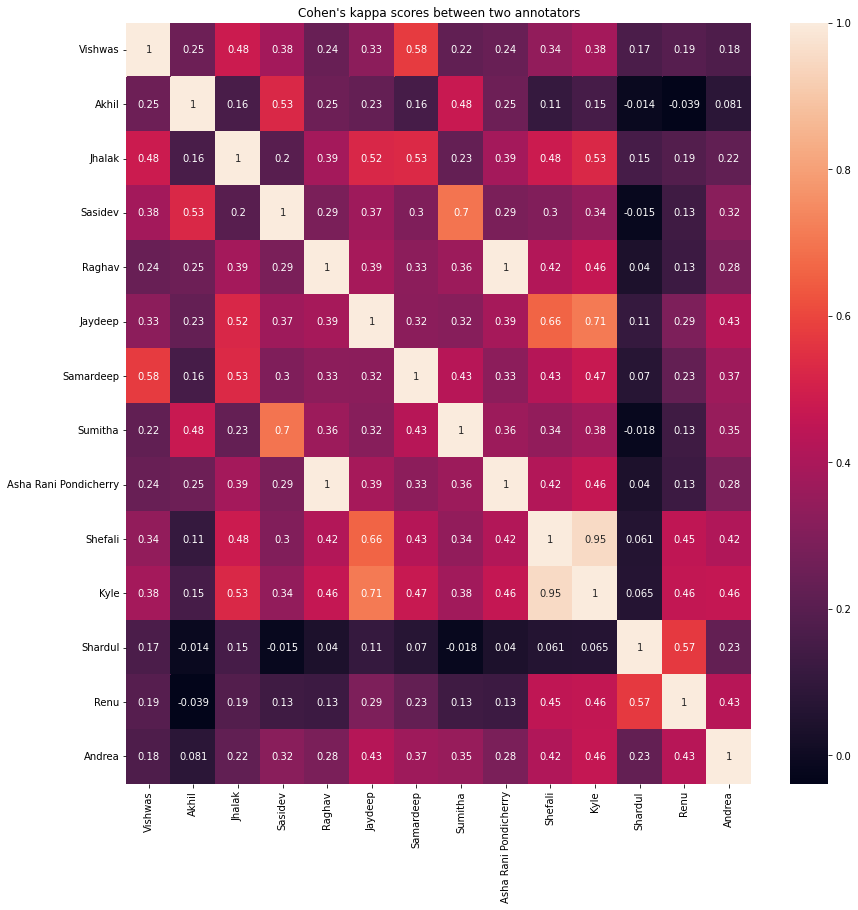

In [18]:
plt.figure(figsize=(14, 14))
heat_map = sns.heatmap(kappas, annot=True)
heat_map.set_xticklabels(subjects, rotation = 90)
heat_map.set_yticklabels(subjects, rotation = 0)
plt.title("Cohen's kappa scores between two annotators")
plt.show()

# 2. Arousal and Valence Annotation Analysis

## Load Data

In [20]:
df_arousal = pd.read_csv('arousal.csv',index_col=0)
df_valence = pd.read_csv('valence.csv',index_col=0)

In [21]:
df_arousal

,Artist,Vishwas,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,,
A Thousand Years,Christina Perri,-1,-1,-1,1,1,-2,-2,-1,1,-1,-1,-1,-1,-4
As it was,Harry Styles,5,4,5,2,4,2,4,1,4,3,3,4,4,-2
Kissing Your Shadow - Roger Voka Remix,"Neteta, Roger Voka",1,5,3,4,2,4,4,2,2,3,2,3,3,1
Minnet Eylemem,Serhat Durmus,-1,4,2,3,1,-2,-2,2,1,-2,-2,-1,-1,-5
Take Me To Church,Hozier,3,5,5,3,5,5,4,2,5,5,3,5,5,-6
Pasoori,Coke studio,4,3,4,2,4,5,2,3,4,2,1,3,3,1
Unstoppable,Sia,-4,-3,3,3,6,6,3,2,6,4,3,4,4,2
Laal Ishq,Arijit Singh,3,1,1,-1,2,2,2,1,2,4,2,1,1,1
Coming Back to Life,Pink Floyd,4,-4,-2,-1,1,1,-5,-2,1,-4,-3,-4,-4,2


In [22]:
df_valence

,Artist,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,
A Thousand Years,Christina Perri,-1,-1,-2,-2,-3,-2,-2,-2,-4,2,-3,-2,3
As it was,Harry Styles,-1,-1,-2,-3,4,6,-1,-3,3,4,2,2,5
Kissing Your Shadow - Roger Voka Remix,"Neteta, Roger Voka",3,-2,-4,1,-2,-3,-3,1,-2,-1,1,1,-4
Minnet Eylemem,Serhat Durmus,1,-2,-4,-3,-3,-4,-4,-3,-3,-2,-4,-4,-4
Take Me To Church,Hozier,-5,-5,-6,-5,-3,-6,-4,-5,-4,-3,1,1,-7
Pasoori,Coke studio,3,3,-2,-2,4,1,2,-2,1,-1,3,3,4
Unstoppable,Sia,1,1,5,4,3,1,4,4,1,1,3,3,3
Laal Ishq,Arijit Singh,1,1,1,-1,3,-1,-2,-1,-2,-1,-2,-2,5
Coming Back to Life,Pink Floyd,-3,-2,2,-2,-3,-3,-4,-2,-1,-2,1,1,3


Find mean and std of arousal and valence scores for each song

In [23]:
stats=pd.DataFrame()
stats["arousal_mean"]=df_arousal.mean(axis=1)
stats["arousal_std"]=df_arousal.std(axis=1)
stats["valence_mean"]=df_valence.mean(axis=1)
stats["valence_std"]=df_valence.std(axis=1)
stats

<ipython-input-23-cbe5bb052293>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats["arousal_mean"]=df_arousal.mean(axis=1)
<ipython-input-23-cbe5bb052293>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats["arousal_std"]=df_arousal.std(axis=1)
<ipython-input-23-cbe5bb052293>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats["valence_mean"]=df_valence.mean(axis=1)
<ipython-input-23-cbe5bb052293>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'n

,arousal_mean,arousal_std,valence_mean,valence_std
Title,,,,
A Thousand Years,-0.928571,1.328057,-1.461538,1.941451
As it was,3.071429,1.859044,1.153846,3.131724
Kissing Your Shadow - Roger Voka Remix,2.785714,1.188313,-1.076923,2.253203
Minnet Eylemem,-0.214286,2.455091,-3.000000,1.414214
Take Me To Church,3.500000,2.928638,-3.923077,2.465142
Pasoori,2.928571,1.206666,1.307692,2.323238
Unstoppable,2.785714,2.991747,2.615385,1.445595
Laal Ishq,1.571429,1.157868,-0.076923,2.177978
Coming Back to Life,-1.428571,2.793241,-1.153846,2.192645


Find most agreed and disagreed songs in terms of arousal and valence, respectively.

Find songs with the higest and lowest arousal and valence scores


In [24]:
stats['arousal_most_disagreed'] = stats.arousal_std == stats.arousal_std.max() #most disagreed
stats['arousal_most_agreed'] = stats.arousal_std == stats.arousal_std.min() #most agreed

stats['valence_most_disagreed'] = stats.valence_std == stats.valence_std.max() #most disagreed
stats['valence_most_agreed'] = stats.valence_std == stats.valence_std.min() #most agreed

stats['arousal_highest'] = stats.arousal_mean == stats.arousal_mean.max() #higest arousal
stats['arousal_lowest'] = stats.arousal_mean == stats.arousal_mean.min() #lowest arousal

stats['valence_highest'] = stats.valence_mean == stats.valence_mean.max() #higest valence
stats['valence_lowest'] = stats.valence_mean == stats.valence_mean.min() #lowest valence

stats

,arousal_mean,arousal_std,valence_mean,valence_std,arousal_most_disagreed,arousal_most_agreed,valence_most_disagreed,valence_most_agreed,arousal_highest,arousal_lowest,valence_highest,valence_lowest
Title,,,,,,,,,,,,
A Thousand Years,-0.928571,1.328057,-1.461538,1.941451,False,False,False,False,False,False,False,False
As it was,3.071429,1.859044,1.153846,3.131724,False,False,True,False,False,False,False,False
Kissing Your Shadow - Roger Voka Remix,2.785714,1.188313,-1.076923,2.253203,False,False,False,False,False,False,False,False
Minnet Eylemem,-0.214286,2.455091,-3.000000,1.414214,False,False,False,False,False,False,False,False
Take Me To Church,3.500000,2.928638,-3.923077,2.465142,False,False,False,False,False,False,False,True
Pasoori,2.928571,1.206666,1.307692,2.323238,False,False,False,False,False,False,False,False
Unstoppable,2.785714,2.991747,2.615385,1.445595,False,False,False,False,False,False,False,False
Laal Ishq,1.571429,1.157868,-0.076923,2.177978,False,True,False,False,False,False,False,False
Coming Back to Life,-1.428571,2.793241,-1.153846,2.192645,False,False,False,False,False,False,False,False


## The happiest and saddest songs

In [25]:
print(stats[stats['valence_highest']==True]['valence_mean'])#highest valence
df_valence[stats['valence_highest']==True]

Title
Happy    5.846154
Name: valence_mean, dtype: float64


,Artist,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,
Happy,Pharrell Williams,4,4,6,7,5,6,7,7,6,5,5,5,9


In [26]:
print(stats[stats['valence_lowest']==True]['valence_mean'])#lowest valence
df_valence[stats['valence_lowest']==True]

Title
Take Me To Church   -3.923077
Name: valence_mean, dtype: float64


,Artist,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,
Take Me To Church,Hozier,-5,-5,-6,-5,-3,-6,-4,-5,-4,-3,1,1,-7


## The most energetic and calm songs

In [27]:
print(stats[stats['arousal_highest']==True]['arousal_mean'])#highest arousal
df_arousal[stats['arousal_highest']==True]

Title
Don't You Worry Child    5.642857
Name: arousal_mean, dtype: float64


,Artist,Vishwas,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,,
Don't You Worry Child,Swedish House Mafia,4,4,7,8,6,5,6,6,6,6,5,4,5,7


In [28]:
print(stats[stats['arousal_lowest']==True]['arousal_mean'])#lowest arousal
df_arousal[stats['arousal_lowest']==True]

Title
Shallow   -1.857143
Name: arousal_mean, dtype: float64


,Artist,Vishwas,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,,
Shallow,"Lady Gaga, Bradley Cooper",-3,-3,2,-2,3,1,-5,-4,3,-4,-2,-4,-4,-4


## The most disagreed songs

In [29]:
print(stats[stats['arousal_most_disagreed']==True]['arousal_std'])#most disagreed song
df_arousal[stats['arousal_most_disagreed']==True]

Title
Space Song    3.172686
Name: arousal_std, dtype: float64


,Artist,Vishwas,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,,
Space Song,Beach House,1,3,-3,-1,-1,-7,4,-3,-1,-2,-2,3,3,-4


In [30]:
print(stats[stats['valence_most_disagreed']==True]['valence_std'])#most disagreed song
df_valence[stats['valence_most_disagreed']==True]

Title
As it was    3.131724
Name: valence_std, dtype: float64


,Artist,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,
As it was,Harry Styles,-1,-1,-2,-3,4,6,-1,-3,3,4,2,2,5


## The most agreed songs

In [31]:
print(stats[stats['arousal_most_agreed']==True]['arousal_std'])#most agreed song
df_arousal[stats['arousal_most_agreed']==True]

Title
Laal Ishq    1.157868
Name: arousal_std, dtype: float64


,Artist,Vishwas,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,,
Laal Ishq,Arijit Singh,3,1,1,-1,2,2,2,1,2,4,2,1,1,1


In [32]:
print(stats[stats['valence_most_agreed']==True]['valence_std'])#most agreed song
df_valence[stats['valence_most_agreed']==True]

Title
Mockingbird    0.767948
Name: valence_std, dtype: float64


,Artist,Akhil,Jhalak,Sasidev,Raghav,Jaydeep,Samardeep,Sumitha,Asha Rani Pondicherry,Shefali,Kyle,Shardul,Renu,Andrea
Title,,,,,,,,,,,,,,
Mockingbird,Eminem,-2,-2,-3,-3,-3,-2,-2,-3,-2,-1,-2,-2,-4


## Similarity

In [37]:
from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics.pairwise import cosine_similarity
import sklearn.metrics
from sklearn.decomposition import NMF

In [38]:
names = df_arousal.columns[1:].to_list()
print(names)

['Vishwas', 'Akhil', 'Jhalak', 'Sasidev', 'Raghav', 'Jaydeep', 'Samardeep', 'Sumitha', 'Asha Rani Pondicherry', 'Shefali', 'Kyle', 'Shardul', 'Renu', 'Andrea']


In [40]:
arousal= np.float32(df_arousal.values[:, 1:])
valence=np.float32(df_valence.values[:, 1:])
integer_encoded_2D=df_clusters.values[:, 1:]
integer_encoded = integer_encoded_2D.T.reshape(integer_encoded_2D.size)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(integer_encoded.size, 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
onehot_encoded = onehot_encoded.reshape(len(names), 5*28)/np.sqrt(28)

print(onehot_encoded.shape)



# clusters = onehot_encoded.reshape((integer_encoded_2D.shape[0], integer_encoded_2D.shape[1], 5))



SM_arousal = cosine_similarity(arousal.T)
SM_valence = cosine_similarity(valence.T)
SM_clusters = onehot_encoded@onehot_encoded.T


(14, 140)


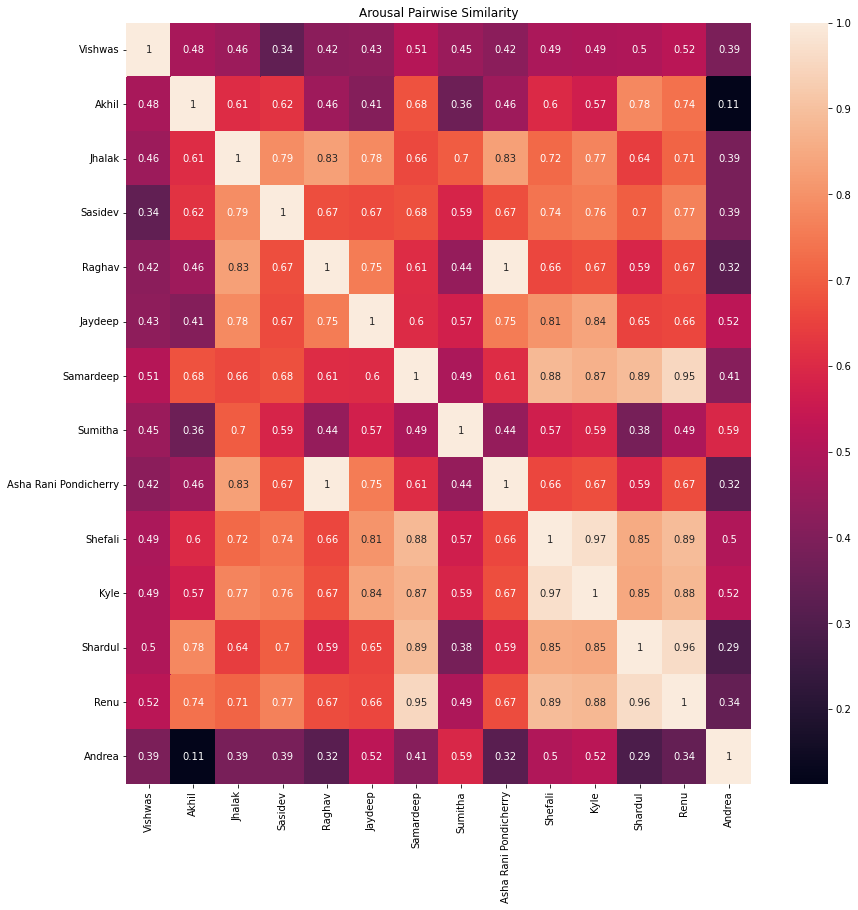

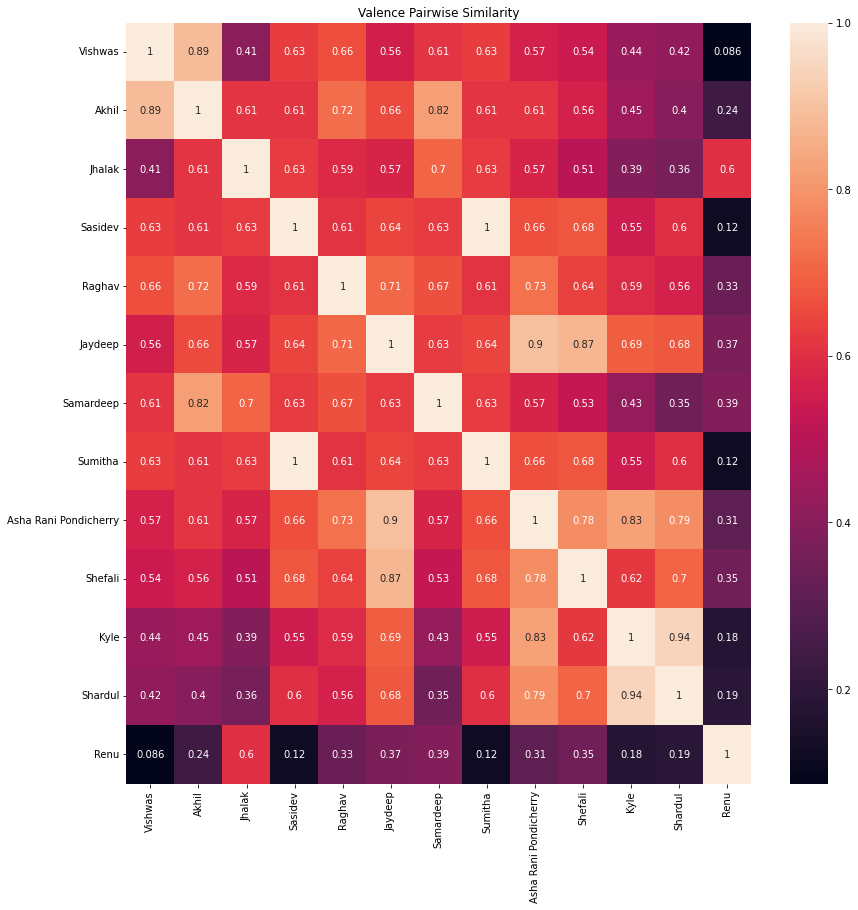

In [46]:
#print(np.min(SM_arousal), np.min(SM_valence), np.min(SM_clusters))
# plt.figure()
# plt.title('Arousal Pairwise Similarity')
# plt.imshow(SM_arousal)
# plt.xticks(ticks=np.arange(8), labels=names, rotation=90)
# plt.yticks(ticks=np.arange(8), labels=names)

import seaborn as sns
plt.figure(figsize=(14, 14))
heat_map = sns.heatmap(SM_arousal, annot=True)
heat_map.set_xticklabels(names, rotation = 90)
heat_map.set_yticklabels(names, rotation = 0)
plt.title('Arousal Pairwise Similarity')
plt.show()


# plt.figure()
# plt.title('Valence Pairwise Similarity')
# plt.imshow(SM_valence)
# plt.xticks(ticks=np.arange(8), labels=names, rotation=90)
# plt.yticks(ticks=np.arange(8), labels=names)

plt.figure(figsize=(14, 14))
heat_map = sns.heatmap(SM_valence, annot=True)
heat_map.set_xticklabels(names, rotation = 90)
heat_map.set_yticklabels(names, rotation = 0)
plt.title('Valence Pairwise Similarity')
plt.show()

# plt.figure(figsize=(8, 8))
# heat_map = sns.heatmap(SM_clusters, annot=True)
# heat_map.set_xticklabels(names, rotation = 90)
# heat_map.set_yticklabels(names, rotation = 0)
# plt.title('Cluster Pairwise Similarity')
# plt.show()



# # plt.figure()
# # plt.title('Arousal + Valence Pairwise Similarity')
# # plt.imshow(SM_arousal+SM_valence)
# # plt.xticks(ticks=np.arange(8), labels=names, rotation=90)
# # plt.yticks(ticks=np.arange(8), labels=names)

# plt.figure(figsize=(8, 8))
# heat_map = sns.heatmap((SM_arousal+SM_valence+SM_clusters)/3, annot=True)
# heat_map.set_xticklabels(names, rotation = 90)
# heat_map.set_yticklabels(names, rotation = 0)
# plt.title('Arousal + Valence Pairwise Similarity')
# plt.show()

plt.show()